# Gradient Descent

In [4]:
from matplotlib import pyplot as plt
from IPython.display import clear_output
import numpy as np

In [58]:
np.random.seed(42)

x = np.random.rand(100, 1)
y = [2*x_i + 10 + 2*np.random.rand() for x_i in x];

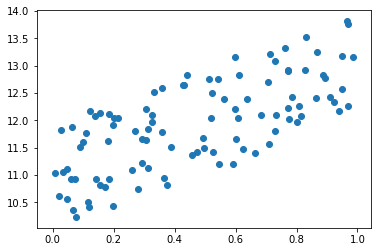

In [60]:
plt.scatter(x, y);

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
lr = LinearRegression().fit(x, y)
print(lr.intercept_)
print(lr.coef_[0])

[11.02719531]
[1.93293671]


In [63]:
def partial_deriv(a, b, x_i, y_i, respect_to):
    '''
    Get the partial derivative for cost function with respect to slope (a) 
    or intercept (b).
    '''
    if respect_to == 'b': # intercept
        return (y_i - (a * x_i + b))
    elif respect_to == 'a': # slope
        return (x_i * (y_i - (a * x_i + b)))
    else:
        print('Choose either respect_to: a or b ')
        return 0

In [64]:
def step_gradient(a, b, x, y, learning_rate):
    db = 0
    da = 0 
    # For each data point, update the derivative for the slope & intercept
    N = len(x)
    for i in range(N):
        
        # Partial derivatives of loss/cost function with respect to b & a
        # Here's where we're taking our averages. Notice that we're leaving
        # off the factors of 2.
        db +=  -(1/N) * partial_deriv(a, b, x[i], y[i], respect_to='b')
        da +=  -(1/N) * partial_deriv(a, b, x[i], y[i], respect_to='a')
        
    # Adjust the slope & intercept by the gradient
    new_b = b - (learning_rate * db)
    new_a = a - (learning_rate * da)
    
    return new_a, new_b

In [65]:
def grad_desc_illus(slope_init, const_init, x, y, n_iter=100, alpha=1,
                   line_color='c', data_color='k'):
    new_slope, new_const = slope_init, const_init
    plt.scatter(x, y, c=data_color)
    plt.plot(x, slope_init*x + const_init)
    for i in range(n_iter):
        clear_output(wait=True)
        guess = {
            'slope': new_slope,
            'intercept': new_const
        }

        # Getting adjusted parameters
        beta_1, beta_0 = step_gradient(guess['slope'],
                                       guess['intercept'],
                                       x, y, learning_rate=alpha)
        new_slope = beta_1
        new_const = beta_0
        plt.scatter(x, y, c=data_color)
        plt.plot(x, new_slope*x + new_const, c=line_color)
        plt.show()
    
    return new_slope, new_const

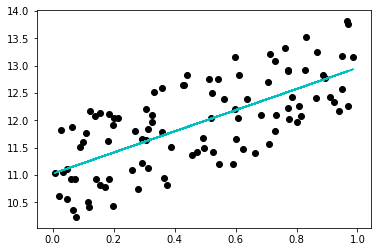

(array([1.93427882]), array([11.02651622]))

In [66]:
grad_desc_illus(3, 8, x, y, alpha=1)

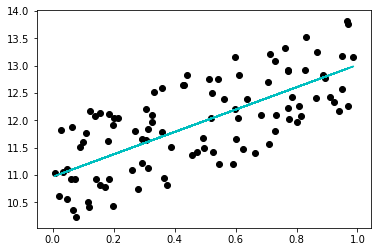

(array([2.042936]), array([10.97153642]))

In [67]:
grad_desc_illus(3, 12, x, y, alpha=0.2)

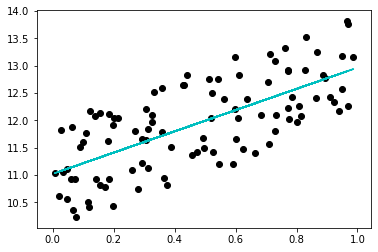

(array([1.9412909]), array([11.02296815]))

In [68]:
grad_desc_illus(10, -5, x, y)